In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from cleanin import clean_titles, first_genre_filmweb, down_sample_both_dfs

In [3]:
## test functions before running
!python test_function.py -v

test_multiple (__main__.GenreTakerTest) ... ok
test_single (__main__.GenreTakerTest) ... ok
test_single_larger (__main__.GenreTakerTest) ... ok
test_single_multiple (__main__.GenreTakerTest) ... ok
test_equal (__main__.SamplingTest) ... ok
test_not_equal (__main__.SamplingTest) ... ok
test_all (__main__.TitleCleaningTest) ... ok
test_proper (__main__.TitleCleaningTest) ... ok
test_upper (__main__.TitleCleaningTest) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.026s

OK


### EDA + cleaning

In [4]:
## Read filmweb data
df_filmweb = pd.read_csv("data/filmweb.csv")
df_filmweb.head()

,title,originalTitle,description,genre
0,Zielona mila,The Green Mile,Emerytowany strażnik więzienny opowiada przyja...,Dramat
1,Skazani na Shawshank,The Shawshank Redemption,Adaptacja opowiadania Stephena Kinga. Niesłusz...,Dramat
2,Forrest Gump,NaN,"Historia życia Forresta, chłopca o niskim ilor...",Dramat / Komedia
3,Leon zawodowiec,Léon,Płatny morderca ratuje dwunastoletnią dziewczy...,Dramat / Kryminał
4,Requiem dla snu,Requiem for a Dream,"Historia czwórki bohaterów, dla których używki...",Dramat


In [5]:
## Read train imdb data
df_imdb_1 = pd.read_csv('data/train_data.txt', sep=":::", header=None, engine='python')
df_imdb_1.columns = ['id', 'title', 'genre', 'description']
df_imdb_1 = df_imdb_1.drop(columns=["id"])

In [6]:
## Read test imdb data
df_imdb_2 = pd.read_csv('data/test_data_solution.txt', sep=":::", header=None, engine='python')
df_imdb_2.columns = ['id', 'title', 'genre', 'description']
df_imdb_2 = df_imdb_2.drop(columns=["id"])

In [7]:
## Combine the imdb datasets to create one big dataset
df_imdb_all = pd.concat([df_imdb_1, df_imdb_2], axis=0).reset_index(drop=True)

In [8]:
## Compare the sizes of two datasets
print(f"Number of samples in filmweb dataset {df_filmweb.shape[0]:,}")
print(f"Number of samples in imdb dataset {df_imdb_all.shape[0]:,}")

Number of samples in filmweb dataset 9,943
Number of samples in imdb dataset 108,414


In [9]:
## Check for Nan's

In [10]:
## We can get the "originalTitle" from the title column
## Because if the title is the same as originalTitle then the second column
## has a NaN as an entry
df_filmweb.isna().sum()

title               0
originalTitle    2366
description         0
genre               0
dtype: int64

In [11]:
df_imdb_all.isna().sum()

title          0
genre          0
description    0
dtype: int64

In [12]:
## If the "originalTitle" is None then the "title" is the "originalTitle"
df_filmweb["originalTitle"][df_filmweb["originalTitle"].isna()] = df_filmweb["title"][df_filmweb["originalTitle"].isna()]

## Let's also drop the "title" column because it's no longer needed and rename the "originalTitle" column to "title"
df_filmweb = df_filmweb.drop(columns="title").rename({"originalTitle": "title"}, axis=1)

In [13]:
## Check again for missing values for filmweb dataset
df_filmweb.isna().sum()

title          0
description    0
genre          0
dtype: int64

In [14]:
## Check unique genres in each move database

In [15]:
df_imdb_all.genre.nunique()

27

In [16]:
## Let's inspect what's going on here
df_filmweb.genre.nunique()

959

In [18]:
## As we can probably deduce a movie can belong to multiple genre
## For the sake of comparison with imdb dataset let's
## only take the first occuring genre as the "true" genre of the movie
## But before that let's first check for the existance of the same
## movies in both datasets, so we can compare them later
df_filmweb.genre.value_counts()

Dramat                                   1038
Komedia                                   491
Horror                                    489
Dramat / Komedia                          382
Thriller                                  353
                                         ... 
Sportowy                                    1
Sensacyjny / Psychologiczny                 1
Dramat / Kryminał / Wojenny                 1
Biograficzny / Komedia / Wojenny            1
Dramat / Komedia / Kryminał / Musical       1
Name: genre, Length: 959, dtype: int64

Let's inspect how the title of both datasets look like

In [19]:
df_filmweb.title

0                 The Green Mile
1       The Shawshank Redemption
2                   Forrest Gump
3                           Léon
4            Requiem for a Dream
                  ...           
9938                  Dark Angel
9939          Pożegnanie z Marią
9940                         Rh+
9941     Wet Hot American Summer
9942                The Sicilian
Name: title, Length: 9943, dtype: object

In [20]:
df_imdb_all.title

0              Oscar et la dame rose (2009) 
1                              Cupid (1997) 
2          Young, Wild and Wonderful (1980) 
3                     The Secret Sin (1915) 
4                    The Unrecovered (2007) 
                         ...                
108409       "Tales of Light & Dark" (2013) 
108410          Der letzte Mohikaner (1965) 
108411                  Oliver Twink (2007) 
108412                    Slipstream (1973) 
108413            Curitiba Zero Grau (2010) 
Name: title, Length: 108414, dtype: object

Unfortunately the imdb dataset contains also the year in which the movie was released(probably), therefore right now we won't be able to check if there are any movies that belong to both datasets, so let's clean the title column in both of the datasets <br>
The cleaning consists of deleting the "(year)" part from each title and also dropping the special characters and making each of them a lower case character.

In [21]:
## Cleanin'
titles_filmweb = df_filmweb["title"].pipe(clean_titles)
titles_imdb = df_imdb_all["title"].pipe(clean_titles)

In [22]:
## Let's check how many titles belong to both datasets
len(set(titles_filmweb) & set(titles_imdb))

2034

In [23]:
## Let's replace the the titles with the cleaned ones
df_filmweb["title"] = df_filmweb["title"].pipe(clean_titles)
df_imdb_all["title"] = df_imdb_all["title"].pipe(clean_titles)

In [24]:
df_filmweb

,title,description,genre
0,the green mile,Emerytowany strażnik więzienny opowiada przyja...,Dramat
1,the shawshank redemption,Adaptacja opowiadania Stephena Kinga. Niesłusz...,Dramat
2,forrest gump,"Historia życia Forresta, chłopca o niskim ilor...",Dramat / Komedia
3,leon,Płatny morderca ratuje dwunastoletnią dziewczy...,Dramat / Kryminał
4,requiem for a dream,"Historia czwórki bohaterów, dla których używki...",Dramat
...,...,...,...
9938,dark angel,Policyjny detektyw zostaje wplątany w zagrażaj...,Thriller / Sci-Fi
9939,pozegnanie z maria,Grupa młodych ludzi próbuje zachować resztki n...,Melodramat / Wojenny
9940,rh+,Rh (+) to opowieść o grupie dwudziestokilkule...,Kryminał / Sensacyjny
9941,wet hot american summer,"Grupa opiekunów letniego obozu, podczas ostatn...",Komedia rom.


In [25]:
df_imdb_all = df_imdb_all.iloc[:, [0,2,1]]
## I've seen that the genre column in imdb dataset was padded with spaces
## and the belowe cell with filmweb data manipulation did not work because of that
## so I've stripped it from those spaces
df_imdb_all["genre"] = df_imdb_all["genre"].str.strip()
df_imdb_all

,title,description,genre
0,oscar et la dame rose,Listening in to a conversation between his do...,drama
1,cupid,A brother and sister with a past incestuous r...,thriller
2,"young, wild and wonderful",As the bus empties the students for their fie...,adult
3,the secret sin,To help their unemployed father make ends mee...,drama
4,the unrecovered,The film's title refers not only to the un-re...,drama
...,...,...,...
108409,tales of light & dark,"Covering multiple genres, Tales of Light & Da...",horror
108410,der letzte mohikaner,As Alice and Cora Munro attempt to find their...,western
108411,oliver twink,A movie 169 years in the making. Oliver Twist...,adult
108412,slipstream,"Popular, but mysterious rock D.J Mike Mallard...",drama


In [26]:
## Okey so now that we have cleaned titles let's clean the genres for filmweb dataset
df_filmweb = df_filmweb.pipe(first_genre_filmweb, set(df_imdb_all.genre))
df_filmweb

,title,description,genre
0,the green mile,Emerytowany strażnik więzienny opowiada przyja...,drama
1,the shawshank redemption,Adaptacja opowiadania Stephena Kinga. Niesłusz...,drama
2,forrest gump,"Historia życia Forresta, chłopca o niskim ilor...",drama
3,leon,Płatny morderca ratuje dwunastoletnią dziewczy...,drama
4,requiem for a dream,"Historia czwórki bohaterów, dla których używki...",drama
...,...,...,...
9938,dark angel,Policyjny detektyw zostaje wplątany w zagrażaj...,thriller
9939,pozegnanie z maria,Grupa młodych ludzi próbuje zachować resztki n...,drama
9940,rh+,Rh (+) to opowieść o grupie dwudziestokilkule...,crime
9941,wet hot american summer,"Grupa opiekunów letniego obozu, podczas ostatn...",comedy


In [27]:
## Let's once again see how many movies are the same in both datasets
## We've lost some movies due to "genre missmatch"(might think about it later)
titles_filmweb = df_filmweb["title"].pipe(clean_titles)
titles_imdb = df_imdb_all["title"].pipe(clean_titles)
len(set(titles_filmweb) & set(titles_imdb))

1986

In [28]:
## Let's also check how many movies that belong to both datasets have the same genre
## Not bad, 1178 movies belong to the same genres according to both datasets
len( set(zip(df_filmweb.title, df_filmweb.genre)) & set(zip(df_imdb_all.title, df_imdb_all.genre)) )

1188

In [29]:
unique_genres_imdb = df_imdb_all.genre.str.strip().unique()

In [30]:
boolean_mask = df_filmweb.genre.isin(unique_genres_imdb)

In [31]:
df_filmweb = df_filmweb[boolean_mask].reset_index(drop=True)

In [32]:
df_filmweb.groupby("genre").size().sort_values(ascending=False)

genre
drama          3899
comedy         1458
thriller        899
horror          696
biography       539
animation       393
action          322
fantasy         281
family          251
crime           244
documentary     243
adventure       162
sci-fi           57
western          53
romance          43
musical          28
war              17
short             7
music             6
dtype: int64

In [33]:
df_imdb_all.groupby("genre").size().sort_values(ascending=False)

genre
drama          27225
documentary    26192
comedy         14893
short          10145
horror          4408
thriller        3181
action          2629
western         2064
reality-tv      1767
family          1567
adventure       1550
music           1462
romance         1344
sci-fi          1293
adult           1180
crime           1010
animation        996
sport            863
talk-show        782
fantasy          645
mystery          637
musical          553
biography        529
history          486
game-show        387
news             362
war              264
dtype: int64

We would prorably have to think about what to do with movies that have less than {n} number of samples because it would be hard to get anything meaningful from them

In [34]:
## drop movies with duplicated descriptions
df_filmweb = df_filmweb.drop_duplicates(subset=["description"])
df_imdb_all = df_imdb_all.drop_duplicates(subset=["description"])

In [35]:
df_filmweb_sampled, df_imdb_all_sampled = down_sample_both_dfs(df_filmweb, df_imdb_all, n_min=50)

In [36]:
(df_filmweb_sampled.groupby("genre").size() == df_imdb_all_sampled.groupby("genre").size()).all()

True

In [37]:
df_filmweb_sampled.sample(frac=1., random_state=42)

,title,description,genre
774,the equalizer,Uznany za zmarłego były żołnierz sił specjalny...,thriller
8337,a few best men,Niewinnie zapowiadające się uroczystości wesel...,comedy
6213,smierc prezydenta,Grudzień 1922 roku. Gabriel Narutowicz zostaje...,biography
6209,the fifth estate,Julian Assange i Daniel Domscheit-Berg zakłada...,biography
2362,this must be the place,Cheyenne za sprawą jednego wydarzenia wyruszy ...,drama
...,...,...,...
5734,ballerina,Jedenastoletnia sierota Felicja ucieka do Pary...,animation
5191,across the universe,"Jude jedzie do Ameryki, by odnaleźć nieznanego...",drama
5390,lavenir,Nathalie uczy filozofii w szkole średniej w P...,drama
860,babylon a.d.,Toorop w ciągu sześciu dni ma przemycić za gra...,thriller


In [38]:
df_imdb_all_sampled.sample(frac=1., random_state=42)

,title,description,genre
774,psycho in-law,It's been two years since Tina's husband-to-b...,thriller
8337,"i will avenge you, iago!",A disillusioned theater enthusiast mistakes O...,comedy
6213,the out 100,"Presented with OUT Magazine, this show celebr...",biography
6209,gola berij,Gola Berij depicts the sum total of the life ...,biography
2362,satbhai,This story is about two step brothers. In thi...,drama
...,...,...,...
5734,chhota bheem and the broken amulet,The kingdom of Africa is captured by Girboro....,animation
5191,secrets of the lakes,A man has a lot of secrets and he hides them ...,drama
5390,dying to belong,When Lisa starts her freshman year of college...,drama
860,ring of deceit,Madison Byrne is a beautiful young art expert...,thriller


In [39]:
## Let's do some more EDA now

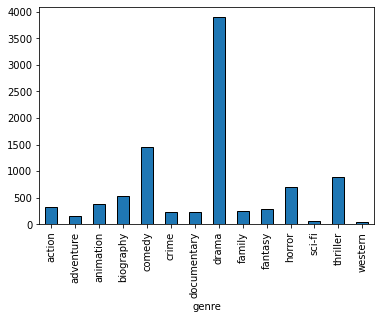

In [40]:
## The same as with imdb dataset (right now at least)
df_filmweb_sampled.groupby("genre").size().plot.bar(edgecolor="k")
plt.show()

Let's check for average number of words by genre in two datasets

In [41]:
df_filmweb_sampled["words_per_description"] = df_filmweb_sampled["description"].str.split().apply(len)
df_imdb_all_sampled["words_per_description"] = df_imdb_all_sampled["description"].str.split().apply(len)

In [42]:
percentile97 = df_imdb_all_sampled["words_per_description"].quantile(0.97)

In [43]:
percentile97

286.0

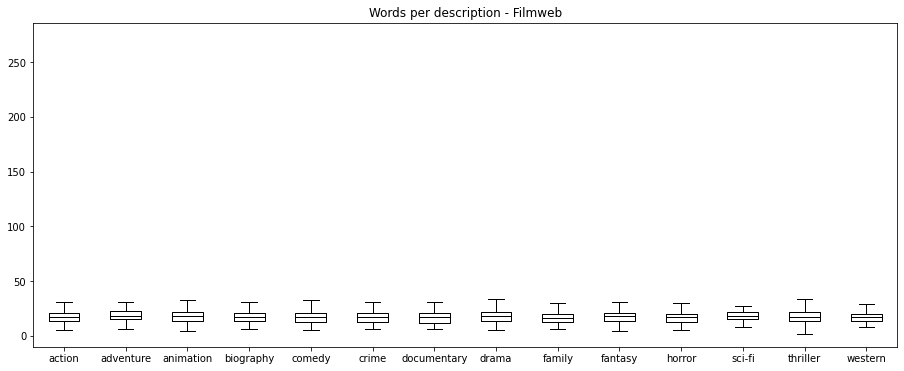

In [44]:
df_filmweb_sampled.boxplot("words_per_description", by="genre", grid=False,
showfliers=False, color="black", figsize=(15, 6))
plt.ylim((-10, percentile97))
plt.title("Words per description - Filmweb")
plt.suptitle("")
plt.xlabel("")
plt.show()

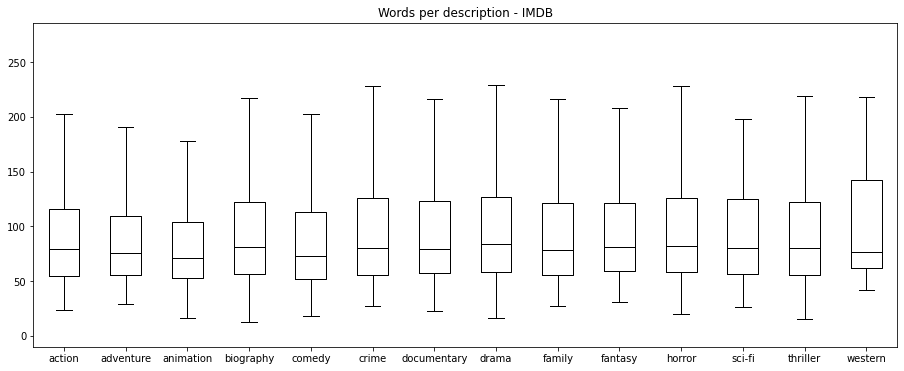

In [45]:
df_imdb_all_sampled.boxplot("words_per_description", by="genre", grid=False,
showfliers=False, color="black", figsize=(15, 6))
plt.title("Words per description - IMDB")
plt.ylim(-10, percentile97)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [46]:
## Let's now export the data for training
if not os.path.isdir("datasets"):
    os.makedirs("datasets")

path_filmweb = "datasets/ready_data_filmweb.csv"
path_imdb = "datasets/ready_data_imdb.csv"
if not os.path.exists(path_filmweb):
    df_filmweb_sampled.drop("words_per_description", axis=1).sample(frac=1., random_state=42).to_csv(path_filmweb, index=False)
    print(f"filmweb data saved at {path_filmweb}")
if not os.path.exists(path_imdb):
    df_imdb_all_sampled.drop("words_per_description", axis=1).sample(frac=1., random_state=42).to_csv(path_imdb, index=False)
    print(f"imdb data saved at {path_imdb}")

#### Some tests with oversampling
This might be needed because classes are heavely imbalanced, but to get something better than random over sampling we would first have to get the feature vector
which will be produced by BERT(at least that's what we plan to use at the moment)

In [168]:
from imblearn.over_sampling import RandomOverSampler

In [169]:
X_filmweb, y_filmweb = df_filmweb_sampled[["title", "description"]], df_filmweb_sampled["genre"]

In [170]:
np.array(X_filmweb).reshape(-1, 2).shape

(9487, 2)

In [171]:
ros = RandomOverSampler(random_state=0)

In [172]:
X_resampled, y_resampled = ros.fit_resample(np.array(X_filmweb).reshape(-1, 2), np.array(y_filmweb).reshape(-1, 1))

In [173]:
pd.Series(y_resampled).value_counts(normalize=True)

thriller       0.071429
action         0.071429
sci-fi         0.071429
animation      0.071429
crime          0.071429
biography      0.071429
horror         0.071429
western        0.071429
family         0.071429
comedy         0.071429
drama          0.071429
fantasy        0.071429
documentary    0.071429
adventure      0.071429
dtype: float64

In [177]:
pd.DataFrame(X_resampled, columns=["title", "description"])

,title,description
0,payback,Zdradzony przez wspólnika złodziej planuje sro...
1,the seasoning house,"Młoda kobieta, będąc opiekunką prostytuujących..."
2,cold creek manor,Rodzina Tilsonów przeprowadza się do nowego do...
3,3 days to kill,W zamian za wykonanie ostatniego zlecenia śmie...
4,the others,"Dzieci Grace cierpią z powodu choroby, przez k..."
...,...,...
54581,das finstere tal,"Austria, koniec XIX wieku. Do małej wioski prz..."
54582,el dorado,Doświadczony rewolwerowiec wraz z trzema towar...
54583,the hateful eight,"Dwaj łowcy głów, próbując znaleźć schronienie ..."
54584,the magnificent seven,"Spokojna, rolnicza wioska jest terroryzowana p..."
